In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 불러오기

In [2]:
skirt = pd.read_csv('http://robjhyndman.com/tsdldata/roberts/skirts.dat', 
                    header=None,
                    skiprows=[0,1,2,3,4])
skirt

,0
0,608.0
1,617.0
2,625.0
3,636.0
4,657.0
5,691.0
6,728.0
7,784.0
8,816.0
9,876.0


# 날짜 적용

In [3]:
t = pd.date_range('1/1/1866','12/31/1911',freq='Y')
t

DatetimeIndex(['1866-12-31', '1867-12-31', '1868-12-31', '1869-12-31',
               '1870-12-31', '1871-12-31', '1872-12-31', '1873-12-31',
               '1874-12-31', '1875-12-31', '1876-12-31', '1877-12-31',
               '1878-12-31', '1879-12-31', '1880-12-31', '1881-12-31',
               '1882-12-31', '1883-12-31', '1884-12-31', '1885-12-31',
               '1886-12-31', '1887-12-31', '1888-12-31', '1889-12-31',
               '1890-12-31', '1891-12-31', '1892-12-31', '1893-12-31',
               '1894-12-31', '1895-12-31', '1896-12-31', '1897-12-31',
               '1898-12-31', '1899-12-31', '1900-12-31', '1901-12-31',
               '1902-12-31', '1903-12-31', '1904-12-31', '1905-12-31',
               '1906-12-31', '1907-12-31', '1908-12-31', '1909-12-31',
               '1910-12-31', '1911-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [4]:
skirt.index = t

(array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60]),
 <a list of 9 Text xticklabel objects>)

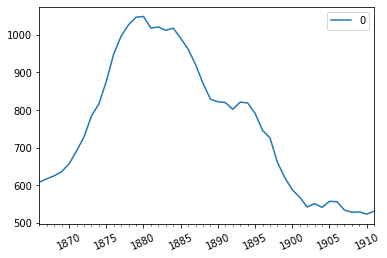

In [27]:
skirt.plot()
plt.xticks(rotation=25)

# 차분 적용

## 1차 적용 -> skirt 를 차분

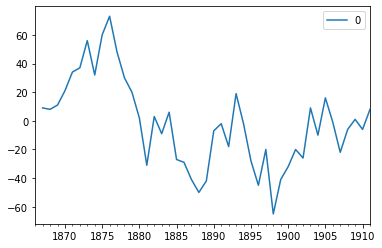

In [8]:
skirt_diff1=skirt.diff(periods=1)
skirt_diff1.plot()

## 2차 적용 --> skirt_diff1 을 차분

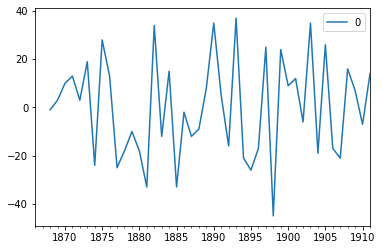

In [9]:
skirt_diff2=skirt_diff1.diff(periods=1)
skirt_diff2.plot()

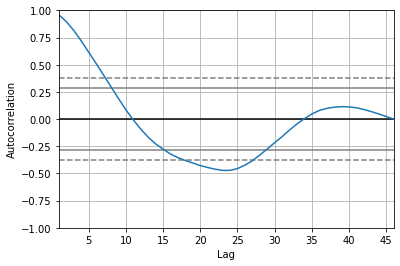

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(skirt)

# 차분한 데이터는 autocorrelation_plot에 안 그려진다.

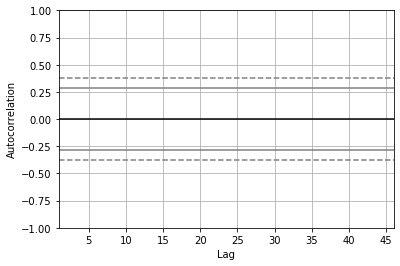

In [13]:
autocorrelation_plot(skirt_diff1)

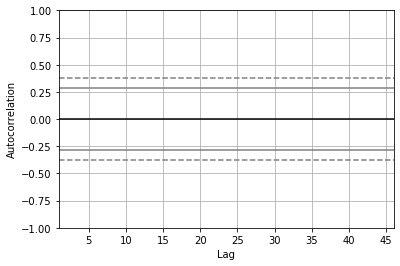

In [14]:
autocorrelation_plot(skirt_diff2)

In [18]:
import pmdarima as pm
stepwise_model = pm.auto_arima(skirt, 
                               start_p=1, 
                               start_q=1,
                               max_p=3, 
                               max_q=3, 
                               m=12, 
                               start_P=0, 
                               seasonal=True, 
                               d=1, 
                               D=1,
                               trace=True, 
                               error_action='ignore', 
                               suppress_warnings=True,
                               stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=345.116, BIC=348.109, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=317.035, BIC=323.021, Fit time=0.086 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=347.184, BIC=348.681, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=325.240, BIC=329.729, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=315.606, BIC=323.089, Fit time=0.397 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=334.190, BIC=340.176, Fit

# Building ARIMA Model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -197.472
Method:                       css-mle   S.D. of innovations             19.295
Date:                Fri, 31 Jan 2020   AIC                            400.944
Time:                        17:42:23   BIC                            406.363
Sample:                    12-31-1867   HQIC                           402.964
                         - 12-31-1911                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4652     11.139     -0.042      0.967     -22.297      21.366
ar.L1.D.y      0.7578      0.092      8.275      0.000       0.578       0.937
                                    Roots           

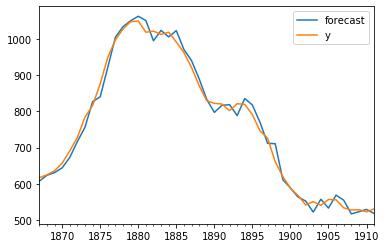

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(skirt[0], 
              order=(1,1,0))

model_fit = model.fit(disp=0)

print(model_fit.summary())
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show() 

## prediction, std error, (lower limit,upper limit)

In [24]:
pred = model_fit.forecast(1)
print(f'prediction: {pred[0]}\nstd error: {pred[1]}\n(lower limit, upper limit): {pred[2]}')

prediction: [536.94936982]
std error: [19.29481075]
(lower limit, upper limit): [[499.13223566 574.76650397]]


# x 값에 대한 예측값

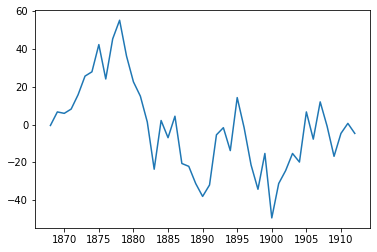

In [28]:
x_based_pred = model_fit.fittedvalues
plt.plot(x_based_pred)